E6 F5 C4 D3


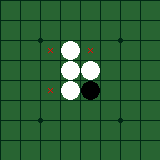

In [9]:
from reversi import *
pos = Position.start()
print(possible_moves(pos))
pos = play(pos, Field.D3)
png(pos)

In [10]:
# Edax is a bit tricky to install on Windows. You need to download the source code and compile it yourself.
# With the location of the compiled executable, you can create an Edax object and use it to solve a position.
edax_location = r"G:\edax-ms-windows\edax-4.4"
edax = Edax(edax_location, level=15)
print(edax.solve_native(pos))

index: 1
selectivity: 73%
intensity: d15@1.1σ
score: +00
time: 0:00.000
nodes: 135'764
speed: ? N/s
pv: E3 F4 C3 C4 D6 E6 C5
best_move: E3
search_result: [+00,+00] d15@1.1σ E3


In [11]:
# Edax seamlessly integrates with the reversi library.
# You can use it as an evaluation function in a search for example.
def edax_at_depth_0(pos: Position, window: OpenInterval, intensity: Intensity) -> SearchResult | None:
    if intensity.depth == 0:
        return edax.solve(pos)
    else:
        return None

tt = HashTable(1_000_000)
pvs = PrincipalVariation(sorted_by_mobility_and_tt(tt), tt, [edax_at_depth_0])
result = pvs.eval(pos, intensity=Intensity(3))
print(result)

[+64,+64] d18@1.1σ C5


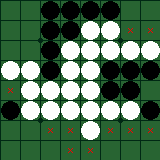

level 1: [+19,+19] d1 D7
level 2: [+19,+19] d2 D7
level 3: [+19,+19] d3 D7
level 4: [+17,+17] d4 H7
level 5: [+19,+19] d5 H7
level 6: [+19,+19] d6 H7
level 7: [+19,+19] d7 H7
level 8: [+17,+17] d8 H7
level 9: [+17,+17] d9 H7
level 10: [+15,+15] d10 H7
level 11: [+18,+18] d11@1.1σ D7
level 12: [+20,+20] d12@1.1σ H7
level 13: [+22,+22] d27@1.5σ D7
level 14: [+22,+22] d27@1.5σ D7


In [12]:
# Loading a position from a file and solving it.
# Uses display() to show the position.
fforum_61 = read_file(r'data\fforum-60-79.pos')[2]
display(png(fforum_61.pos))
for level in range(1, 15):
    edax = Edax(edax_location, level=level)
    result = edax.solve(fforum_61.pos)
    print(f"level {level}: {result}")
